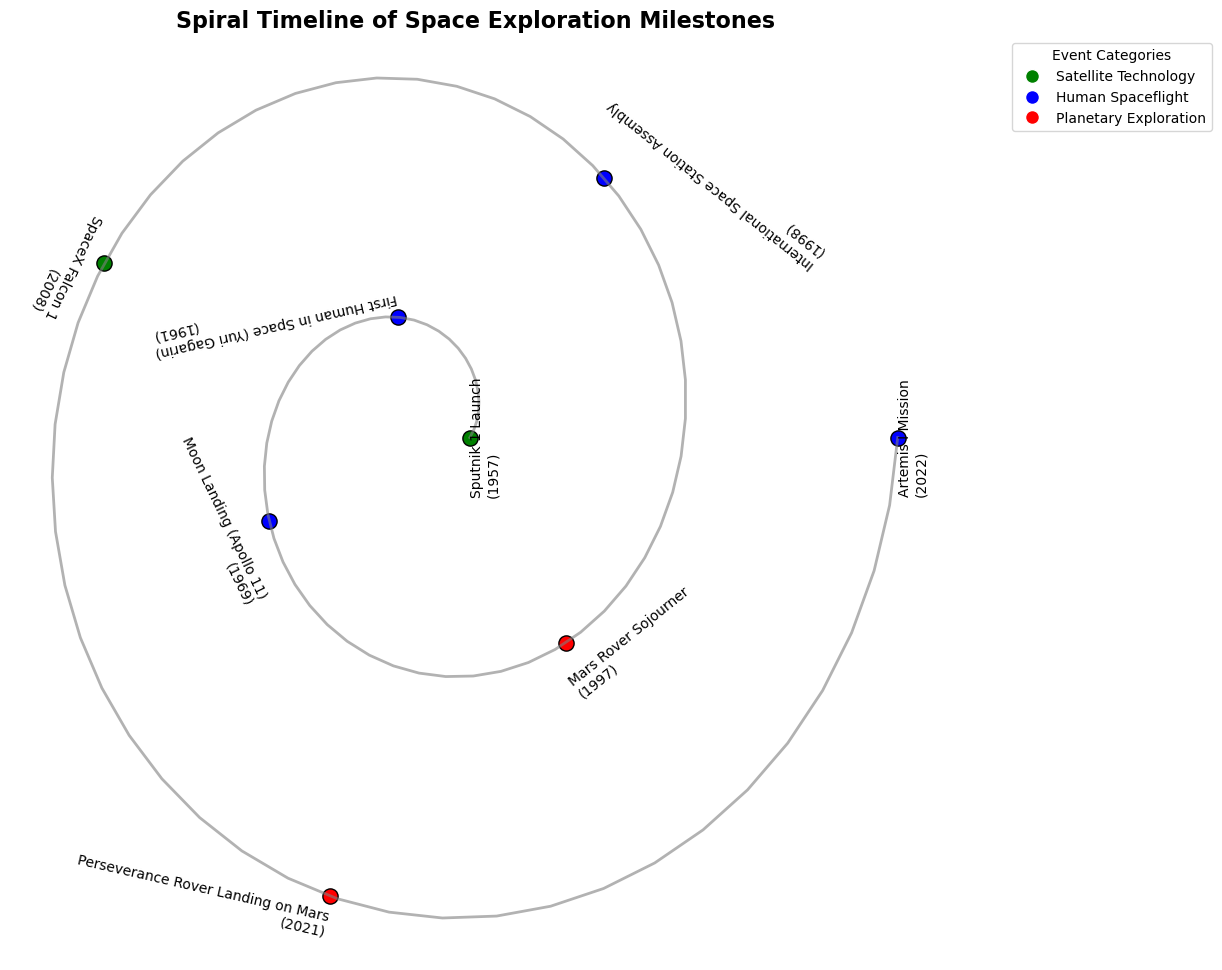

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the Space exploration milestones
events = [
    (1957, "Sputnik 1 Launch", "Satellite Technology"),
    (1961, "First Human in Space (Yuri Gagarin)", "Human Spaceflight"),
    (1969, "Moon Landing (Apollo 11)", "Human Spaceflight"),
    (1997, "Mars Rover Sojourner", "Planetary Exploration"),
    (1998, "International Space Station Assembly", "Human Spaceflight"),
    (2008, "SpaceX Falcon 1", "Satellite Technology"),
    (2021, "Perseverance Rover Landing on Mars", "Planetary Exploration"),
    (2022, "Artemis I Mission", "Human Spaceflight")
]

# Convert it into DataFrame
df = pd.DataFrame(events, columns=['Year', 'Event', 'Category'])

# Define color mapping for the categories
def category_color(category):
    colors = {
        "Human Spaceflight": "blue",
        "Planetary Exploration": "red",
        "Satellite Technology": "green"
    }
    return colors.get(category, "gray")

# Generate the coordinates for Spiral timeline
num_events = len(df)
theta = np.linspace(0, 4 * np.pi, num_events)  
r = np.linspace(1, 10, num_events)  

# Convert the Polar coordinates into Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Creat the Figure and axis
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_title("Spiral Timeline of Space Exploration Milestones", fontsize=16, fontweight='bold')

# Plotting the Spiral path
spiral_theta = np.linspace(0, 4 * np.pi, 100)
spiral_r = np.linspace(1, 10, 100)
spiral_x = spiral_r * np.cos(spiral_theta)
spiral_y = spiral_r * np.sin(spiral_theta)
ax.plot(spiral_x, spiral_y, linestyle='solid', color='gray', alpha=0.6, linewidth=2)

# Plotting the events on Spiral
for i, row in df.iterrows():
    ax.scatter(x[i], y[i], color=category_color(row['Category']), s=120, edgecolors='black', linewidth=1)

    
    rotation_angle = np.degrees(theta[i]) + 90  # Adjust for outward text alignment
    ha = "left" if np.cos(theta[i]) > 0 else "right"  # Ensure proper text alignment
    ax.text(x[i], y[i], f"{row['Event']}\n({row['Year']})", fontsize=10, ha=ha,
            va='center', color='black', rotation=rotation_angle)

# Adding the Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_color(cat), markersize=10)
           for cat in df['Category'].unique()]
ax.legend(handles, df['Category'].unique(), title="Event Categories", loc="upper right", bbox_to_anchor=(1.3, 1))

# Show the Plot
plt.show()